# Predicting Kobe Bryant Shot Selection

Motivation: [Kaggle's Kobe Bryant Shot Selection](https://www.kaggle.com/c/kobe-bryant-shot-selection)

This this notebook we will be analyzing the consistency of Kobe Bryant's Career. We will be using 20 years of data on Kobe's swishes and misses, can you predict which shots will find the bottom of the net? This competition is well suited for practicing classification basics, feature engineering, and time series analysis. Practice got Kobe an eight-figure contract and 5 championship rings. What will it get you?

![](https://pbs.twimg.com/media/Dcso-I3V4AA0H2X.jpg)

On December 18, 2017, The Los Angeles Lakers retired both the number 8 and number 24. These numbers belong to the one, the only, __Kobe Bean Bryant__. Kobe Bryant successfully conquered his journey in 20 seasons in the NBA. For ten years he wore the number 8 and the other ten he wore the number 24.




-----

## Import, Data Load and Examination

In [111]:
import pandas as pd
import numpy as np

# Display up to 100 columns of a dataframe
pd.set_option('display.max_columns', 100)

# visualizations
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("paper")
import matplotlib.pyplot as plt

In [112]:
kobe = pd.read_csv('data.csv')
kobe.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [113]:
kobe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

Data Quality Check - lets check the columns that contain `NaN` values.

In [114]:
kobe.columns[kobe.isnull().any()].tolist()

['shot_made_flag']

In [115]:
kobe = kobe[kobe['shot_made_flag'].notnull()]
kobe.columns[kobe.isnull().any()].tolist()

[]

--------
##  Exploratory Analysis

In [116]:
kobe.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,25697.000000,2.569700e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,2.569700e+04,25697.000000
mean,249.348679,2.474109e+07,33.953043,7.148422,91.257345,-118.262652,4.886796,2.520800,0.146243,28.311554,13.457096,0.446161,1.610613e+09,15328.166946
std,149.778520,7.738108e+06,0.088152,110.073147,88.152106,0.110073,3.452475,1.151626,0.353356,17.523392,9.388725,0.497103,0.000000e+00,8860.462397
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,2.000000
25%,111.000000,2.050006e+07,33.884300,-67.000000,4.000000,-118.336800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7646.000000
50%,253.000000,2.090034e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15336.000000
75%,367.000000,2.960027e+07,34.040300,94.000000,160.000000,-118.175800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,22976.000000
max,653.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


Starting off let just get a perspective of some basic stats.. the distribution between whether kobe made a shot or missed a shot. below and throughout the rest of the exploritory section we will use `seaborn` as our data visualization library (which is based on `matplotlib`) that, in my perspective, provide a better interface for some really neat graphs for statistical data. 

shot_made_flag
0.0    14232
1.0    11465
dtype: int64


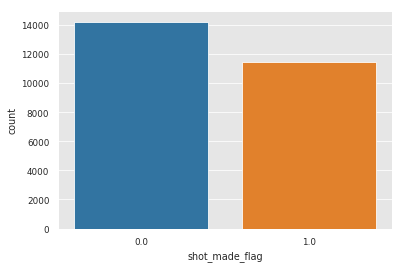

In [117]:
sns.countplot(kobe['shot_made_flag'], label="Count")
print(kobe.groupby('shot_made_flag').size())

Next let see the distirbution of kobe's `shot zone` _(where kobe shot the ball on the court)_ and the number of time he made or missed the shot.

['Mid-Range' 'Restricted Area' 'In The Paint (Non-RA)' 'Above the Break 3'
 'Right Corner 3' 'Backcourt' 'Left Corner 3']


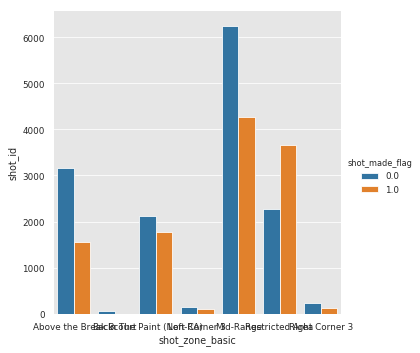

In [118]:
print(kobe.shot_zone_basic.unique())
sns.catplot(x='shot_zone_basic', y='shot_id',
            hue='shot_made_flag', kind='bar',
           data=kobe.groupby(['shot_zone_basic','shot_made_flag'])['shot_id'].count().reset_index())\


#### Distribution of observatios within the shots made category
Below we we summarize the distribution of shots made by using a box plot which facilitates easy comparisions across the `combined shot type` category to see the distribution of `shots_made_flag`. 

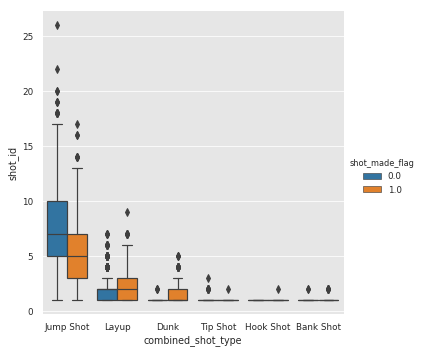

In [119]:
sns.catplot(x='combined_shot_type', y='shot_id', hue='shot_made_flag',kind='box', data=kobe.groupby(['game_date','combined_shot_type','shot_made_flag'])['shot_id'].count().reset_index())

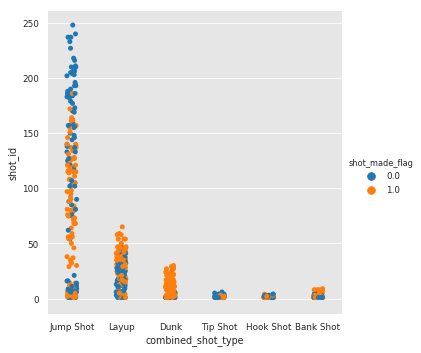

In [120]:
sns.catplot(x='combined_shot_type', y='shot_id', hue='shot_made_flag', data=kobe.groupby(['season','period','combined_shot_type','shot_made_flag'])['shot_id'].count().reset_index())

Next we look at the distribution of kobe's shot using `catplot`'s `FacetGrid` which we can used to easily add faceting variables to fisualize higher dimensional relationships. We will use this to show Kobe's shot selection in aggregation by `season` showing the `combined shot category` according to whether he made or missed the shot. 

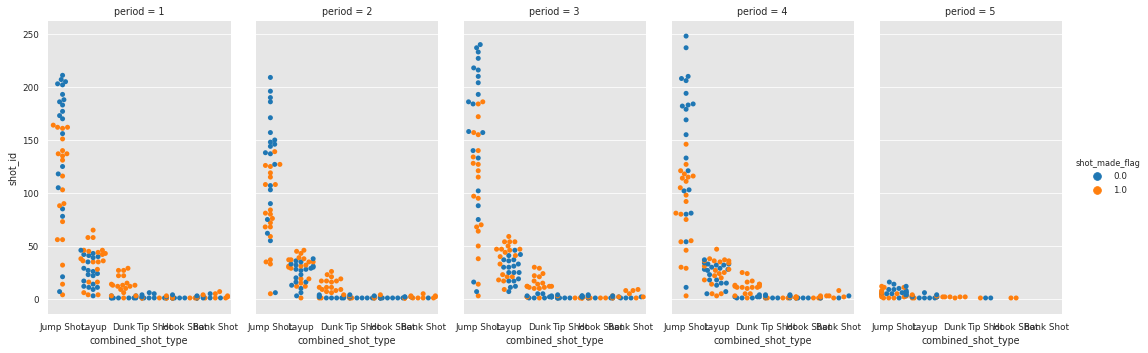

In [121]:
sns.catplot(x="combined_shot_type", y="shot_id", hue="shot_made_flag",
            col="period", aspect=.6,
            kind="swarm", 
            data=kobe[kobe.period <=5].groupby(['season','period','combined_shot_type','shot_made_flag'])['shot_id'].count().reset_index())

Next we will use a `point plot` which is an alternative style for visualizing the same information above but in a way that encodes the value of the `shot made flag` that has a bar to plot point esitmates and confidence intervals. Using the `hue` category, we are able to visualize the `combined_shot_type` category. This makes it easy to see how the main relationship is changin as a functino of the hue semantic.  

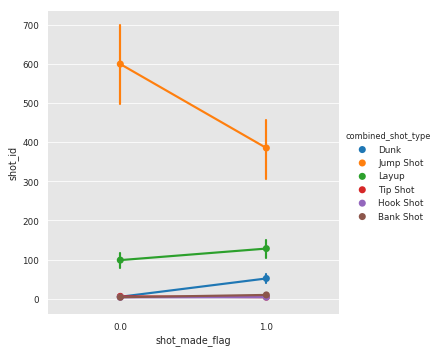

In [122]:
sns.catplot(x='shot_made_flag', y='shot_id', 
            hue='combined_shot_type', kind='point',
            data=kobe.groupby(['season','combined_shot_type','shot_made_flag'])['shot_id'].count().reset_index())

From the chart above we can see that still there is a high distributino of the shots Kobe takes as a jump shot compared to the other types of shots he takes. Howver we can see that in some cases (which is slightly surprising) his `layups` were often more accurate than his `dunks`. 

In [123]:
kobe.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,0,2000-01,32,14,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6


----
## Looking for Correlations

Next we use several methods to evaluate the corrletions of the kobe bryant shot selection. Just starting off we can already get a glimps of the relathipships of `season`, `combined_shot_type` and `shot_zone_basic`. Next we will calcuate the correlation for a set of features that we think will have an impact in predicting whether Kobe makes or misses a shot. 

In the past to solve for such correlation, we would have had to bring out the ol' notebook, calculator and pencil. Instead of having to master the original formula _(below)_ for __Pearson Correlation Coefficient__ we can use a couple of functions and in a nic of time we have our results of correlations between different features. 

![https://www.datascience.com/blog/introduction-to-correlation-learn-data-science-tutorials](https://render.githubusercontent.com/render/math?math=%5Crho_%7BX%2CY%7D%20%3D%20%5Cfrac%7B%5Csum%28X_i%20-%20%5Cbar%7BX%7D%29%28Y_i%20-%20%5Cbar%7BY%7D%29%7D%7B%5Csqrt%7B%5Csum%28X_i%20-%20%5Cbar%7BX%7D%29%5E2%20%5Csum%28Y_i%20-%5Cbar%7BY%7D%29%5E2%7D%20%7D&mode=display)

However, life isnt always _that_ easy. We will have to know how to interprete the data. So therefore, we must understand Pearsons `p` Correlation Coefficient in some capacity. So lets gets just get some basic level setting so we can get on with the fun.
* __Covariance__ is a statitical measure of associate between two variables `X` and `Y`. Such as given a random defense guarding Kobe, at a random time in the game, at a random location `:X`, if Kobe were to shot the ball, would the result be a make or a miss `:Y` . Essentially the se centered scores are multiplied together to measure twhether the increase in one variable associates with the increase in another. 
* __Pearson Correlation__ measures the linear association between continuous variables. In other words, the coefficient quantifies the degree to which a relationship between two variables can be described by a line. In the formula listed above, basically its read as the raw observations are centered by subtracting their means and rescaled by a measure of standard deviation. 
* __Interpreting the Pearson Correlation Result__ when calculating Pearson Correlation the resulting number you get will ALWAYS be between 1 and -1. 
    * The close the `p` result is to `+1` the more of an `incrase` in one variable associates with an increase in the ovther. 
    * On the other hand, the closer `p` result is to `-1`, the increase in one variable would result in `decrease` in the other. 
    * If the `p` result is close to `0` we can say `X` and `Y` are indepenent (but not vice versa). 

In [124]:
kobe_corr = kobe.corr()
kobe_corr['shot_made_flag'].sort_values(ascending=False)

shot_made_flag       1.000000
lat                  0.148070
seconds_remaining    0.030804
minutes_remaining    0.028342
loc_x               -0.000848
lon                 -0.000848
playoffs            -0.001257
game_id             -0.001612
shot_id             -0.013016
period              -0.032152
game_event_id       -0.037232
loc_y               -0.148070
shot_distance       -0.198242
team_id                   NaN
Name: shot_made_flag, dtype: float64

okay... well we didnt get high indication on correlation just on the dataset which we were given. In cases this this, its best to talk with an individual knowledgeable about the dataset, the area we are evaluating and some awesome feature engineering skills. Good think you came here... lets solve this problem one at a time. 

...We will return to finding correlations... first we need to take a step back and see if we can improve on the set of features we have now...this next step is called feature engineering. 

----

## Feature Engineering

The first feature that come that can assist with predicing kobe's shot is to add a feature _(or column)_ to indicate whether he made or missed his last shot. Make sense right... if we can have prior knowedge if Kobe made or missed his last shot, it can reasonable be an indicator as to whether he will make or miss his current/future shot with some range of standard error. Therefore lets create a column that indicate whether he made or miss his last shot. We also need to account for the current shot and last shot were all in the same period of the same game

In [125]:
kobe = kobe.reset_index(drop=True)
fullplays = len(kobe)
#set first prior shot of Kobe's career to 0
kobe.loc[0,'prior_shot_made'] = 0

#set first cum shot of Kobe's career to 0
kobe.loc[0,'cum_shot_made'] = 0

for i in range(1, fullplays):                
    if (kobe.loc[i-1, 'game_id'] == kobe.loc[i, 'game_id']) & (kobe.loc[i-1,'period'] == kobe.loc[i,'period']):
        
        #last shot was a miss
        if (kobe.loc[i-1, 'shot_made_flag'] == 0):
            kobe.loc[i, 'prior_shot_made'] = 0
        else:
            kobe.loc[i, 'prior_shot_made'] = 1

    # reset hot shot after each quarter
    else:
        kobe.loc[i, 'prior_shot_made'] = 0

        
#last shot 2 shots were miss -1 
#test.loc[((test.shot_made_flag == 0) & (test.prior_shot_made == 0)), 'prior_shot_made'] = -1
        
# cumsum made shots
kobe['cum_shot_made'] = (kobe.groupby(['game_id','period'])['shot_made_flag'].cumsum())

Next an interesting feature would be to get a better timeline of the game, while we have both `minutes_remaining` and `seconds remaining` these would actually be quite arbitrary to the model if we just fed in directly as indicated by the correlation. it would be true that the correlation of time and shots made should be correlated or at least shot type and time but currently they are broken out in an unuseful format for our model to use effectively. So therefore we will create another timeline to get `secFromGameStart`.

In [126]:
# Thanks: https://www.kaggle.com/selfishgene/psychology-of-a-professional-athlete
kobe['secondsFromPeriodEnd'] = 60*kobe['minutes_remaining']+kobe['seconds_remaining']
kobe['secondsFromPeriodStart'] = 60*(11-kobe['minutes_remaining'])+(60-kobe['seconds_remaining'])
kobe['secondsFromGameStart'] = (kobe['period'] <= 4).astype(int)*(kobe['period']-1)*12*60 + (kobe['period'] > 4).astype(int)*((kobe['period']-4)*5*12*60) + kobe['secondsFromPeriodStart']

Create a `hothand` function to group kobe shots based on the number consecutive shots 

In [127]:
def hothand(y):
    if y  > 4:
        return 'fire'
    elif y == 3:
        return 'hot hand'
    elif y == 2:
        return 'heat'
    elif y >= 0:
        return 'avg'
    elif y < 0:
        return 'cold'

In [128]:
kobe['hot_hand'] = [hothand(k) for k in kobe.cum_shot_made.values]

Lets see the distribution of the `hothand` function on Kobe. 

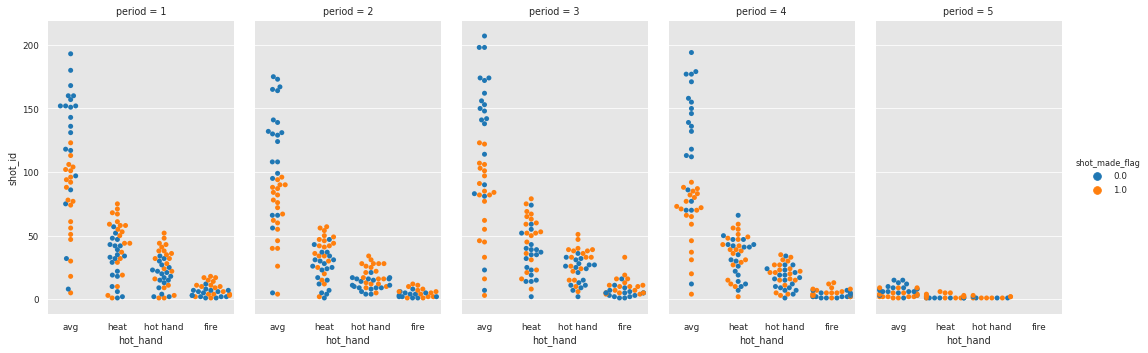

In [129]:
sns.catplot(x="hot_hand", y="shot_id", hue="shot_made_flag",
            col="period", aspect=.6,
            kind="swarm", 
            data=kobe[kobe.period <=5].groupby(['season','period','hot_hand','shot_made_flag'])['shot_id'].count().reset_index())

Lets create a feature to keep track of Kobe's current points. Perhaps the more points Kobe has the higher likelihood we can predict whether his next shot will go in. 

Below is a bar graph showing whether Kobe made or missed by quarter.

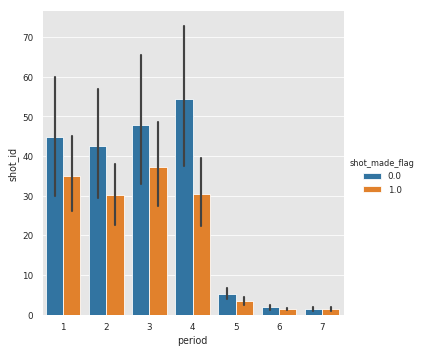

In [251]:
sns.catplot(x='period', y='shot_id', hue='shot_made_flag', kind='bar',
            data=kobe.groupby(['season','period','combined_shot_type','shot_made_flag'])['shot_id'].count().reset_index())

below is the indicator we will use to determine wither kobe score was worth 2 or 3 points.

In [252]:
kobe.shot_type.unique()

array(['2PT Field Goal', '3PT Field Goal'], dtype=object)

2 Pts and 3Pts now we convert each make and miss to a score and then we cumulatively sum it for a running average.

In [254]:
kobe.loc[(kobe['shot_made_flag']==1) & (kobe['shot_type']=='2PT Field Goal'),'pts'] = 2
kobe.loc[(kobe['shot_made_flag']==1) & (kobe['shot_type']=='3PT Field Goal'),'pts'] = 3
kobe.loc[kobe['shot_made_flag']==0,'pts'] = 0
kobe['pts'] = (kobe.groupby(['game_id','period'])['pts'].cumsum())

Next lets create a field goal percentage

__Formula__
Field goal percentage (FG%) calculates as:
![](https://s0.wp.com/latex.php?latex=%5Cfrac%7B%5Ctext%7BField+Goals%7D%7D%7B%5Ctext%7BField+Goal+Attempts%7D%7D&bg=ffffff&fg=000&s=0)

In [334]:
# 2 Pointers
kobe.loc[kobe['shot_type']=='2PT Field Goal','field_goal_attempts'] = 1
kobe.loc[kobe['shot_type']=='3PT Field Goal','field_goal_attempts'] = 0
kobe.loc[(kobe['shot_made_flag']==1) & (kobe['shot_type']=='2PT Field Goal'),'field_goal'] = 1
kobe.loc[kobe['field_goal'].isnull(),'field_goal'] = 0
kobe['field_goal_attempts'] = (kobe.groupby(['game_id'])['field_goal_attempts'].cumsum())
kobe['field_goal'] = (kobe.groupby(['game_id'])['field_goal'].cumsum())
kobe['fg_pct'] = kobe.field_goal / kobe.field_goal_attempts
kobe.loc[kobe['fg_pct'].isnull(),'fg_pct'] = 0


# 3 Pointers
kobe.loc[kobe['shot_type']=='3PT Field Goal','three_pt_attempts'] = 1
kobe.loc[kobe['shot_type']=='2PT Field Goal','three_pt_attempts'] = 0
kobe.loc[(kobe['shot_made_flag']==1) & (kobe['shot_type']=='3PT Field Goal'),'three_pt'] = 1
kobe.loc[kobe['three_pt'].isnull(),'three_pt'] = 0
kobe['three_pt_attempts'] = (kobe.groupby(['game_id'])['three_pt_attempts'].cumsum())
kobe['three_pt'] = (kobe.groupby(['game_id'])['three_pt'].cumsum())
kobe['three_pct'] = kobe.three_pt / kobe.three_pt_attempts
kobe.loc[kobe['three_pct'].isnull(),'three_pct'] = 0

below is Kobe's `fg_pct` field goal percentage that is aggregated by season and by quarter. The x axis is the `fg_pct` the further to the right the more accuract (or higher) Kobe's `2PT Field Goal` were. The y axis shows the number of points scored for that quarter. 

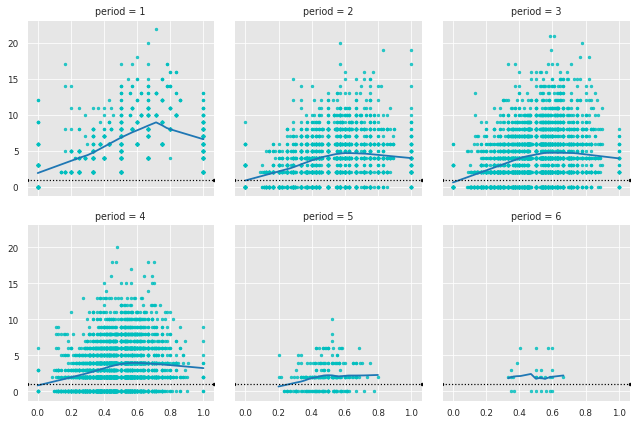

In [361]:
g = sns.lmplot('fg_pct', 'pts', col='period', data=kobe[kobe.period <=6].groupby(['season','period','pts','fg_pct'])['shot_id'].count().reset_index(),
               markers=".", scatter_kws=dict(color='c'),
              col_wrap=3, height=3, lowess=True)
g.map(plt.axhline, y=1, color="k", ls=":");

In [ ]:
sns.catplot(x='period', y='shot_id', hue='shot_made_flag', kind='bar',
            data=kobe.groupby(['season','period','combined_shot_type','three_pct','fg_pct'])['shot_id'].count().reset_index())

### One Hot Encoding

Here is a key learning, if we look back at our inital attempt at correlating the initial features, we can see the list of correlations is quite small.. this is because: ___machine learning algorithms cannot work with categorical data directly___. The solution is to convert the categorical data into numbers. We will be using `one hot encoding` to convert the selected categorical data such as `shot_zone_basic` that tells us if Kobe shot a restricted by another play or if he was shooting a 3 pointer. 

Basically `one hot encoding` is a way to represent categorical variables as binary vectors. We will first have to mapp the categorical values to integer values and then each integer value will be represented as a binary vector, which basically means that all zero values except the edex of the integer will be marked with a 1. 

You ask do we have to do this manually? Of course not we can use `scikit learn` `OneHotEncoder` class to convert numerical labels into a one hot encoded representation. This class requires numerical labels as inputs. Because our Color and Make colums contain text, we first need to convert them into numerical labels. We will use `scikit learn` `LabelEncoder` class to help us perform this step. 

We will start by iniializing 3 label encoders, below are the labels and the current unique categories. 

* `shot_zone_range`: '8-16 ft.', '16-24 ft.', 'Less Than 8 ft.', '24+ ft.','Back Court Shot'
* `shot_type` : '2PT Field Goal', '3PT Field Goal'
* `shot_zone_basic`: 'Mid-Range', 'Restricted Area', 'In The Paint (Non-RA)','Above the Break 3', 'Right Corner 3', 'Backcourt', 'Left Corner 3'

In [132]:
from sklearn.preprocessing import LabelEncoder

le_shot_zone_range = LabelEncoder()
le_shot_type = LabelEncoder()
le_shot_zone_basic = LabelEncoder()

Next we call `fit_transformation` method which will process our data and transform the text into one numerical value for each.

In [133]:
kobe['range_encoded'] = le_shot_zone_range.fit_transform(kobe.shot_zone_range)
kobe['type_encoded'] = le_shot_type.fit_transform(kobe.shot_type)
kobe['basic_encoded'] = le_shot_zone_basic.fit_transform(kobe.shot_zone_basic)

In [134]:
kobe[kobe.columns[-5:]].head()

,secondsFromGameStart,hot_hand,range_encoded,type_encoded,basic_encoded
0,98,avg,2,0,4
1,255,avg,0,0,4
2,308,avg,0,0,4
3,1061,avg,4,0,5
4,1588,avg,2,0,4


Looking at the `range_encoded` column and compare it to the `shot_zone_range` which is the column we encoded, we can see that labels 8-16 ft.= 2; 16-24 ft. = 0, Less Than 8 ft. = 4 and so on. Great! Now that we have made our own features and can see how each has its own numerical value on the new `range_encoded` column we can go to the last step for `One Hot Encoding`

Now that we have encoded the labels to numeric values, we can utilize `scikit learn` `OneHotEncoder` class to perform the one hot encoding.

In [136]:
from sklearn.preprocessing import OneHotEncoder

range_ohe = OneHotEncoder()
type_ohe = OneHotEncoder()
basic_ohe = OneHotEncoder()

First initialize the `OneHotEncoder` class to transform the color feature. The `fit_transform` method expects a 2D array, reshape to transform from 1D to a 2D array.

The `fit_transform` method returns a sparse array. Use the toarray() method to return a numpy array and assign this to variable X which has our one hot encoded results.

In [137]:
Xrange = range_ohe.fit_transform(kobe.range_encoded.values.reshape(-1, 1)).toarray()
Xtype = type_ohe.fit_transform(kobe.type_encoded.values.reshape(-1, 1)).toarray()
Xbasic = basic_ohe.fit_transform(kobe.basic_encoded.values.reshape(-1, 1)).toarray()

Below is an example of a sparse array from the `basic_encoded` values that have been one hot encoded. 

In [138]:
Xrange

array([[ 0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

Finally we add the sparse arrays back to our `Kobe` dataframe. 

In [139]:
# shot_zone_range
dfOneHot = pd.DataFrame(Xrange, columns = ['range_'+str(int(i)) for i in range(Xrange.shape[1])])
kobe = pd.concat([kobe, dfOneHot], axis=1)

# shot_type
dfOneHot = pd.DataFrame(Xtype, columns = ['type_'+str(int(i)) for i in range(Xtype.shape[1])])
kobe = pd.concat([kobe, dfOneHot], axis=1)

# shot_zone_basic
dfOneHot = pd.DataFrame(Xbasic, columns = ['basic_'+str(int(i)) for i in range(Xbasic.shape[1])])
kobe = pd.concat([kobe, dfOneHot], axis=1)

In [140]:
kobe.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,prior_shot_made,cum_shot_made,secondsFromPeriodEnd,secondsFromPeriodStart,secondsFromGameStart,hot_hand,range_encoded,type_encoded,basic_encoded,range_0,range_1,range_2,range_3,range_4,type_0,type_1,basic_0,basic_1,basic_2,basic_3,basic_4,basic_5,basic_6
0,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2,0.0,0.0,622,98,98,avg,2,0,4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3,0.0,1.0,465,255,255,avg,0,0,4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4,1.0,1.0,412,308,308,avg,0,0,4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5,0.0,1.0,379,341,1061,avg,4,0,5,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,0,2000-01,32,14,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6,0.0,0.0,572,148,1588,avg,2,0,4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Label Binarizer

I wanted to show you exactly how `One Hot Encoding` works, however, `SciKit Lear` provides a class classed `LabelBinarizer` that performs the one hot encoding in a single step. Below we will use `LabelBinarizer` for our `hot_hand` feature.

`hot_hand` values: 'avg', 'heat', 'hot hand', 'fire'

In [141]:
from sklearn.preprocessing import LabelBinarizer

hot_lb = LabelBinarizer()
Xhot = hot_lb.fit_transform(kobe.hot_hand.values)

In [157]:
le_hot = LabelEncoder()
kobe['hot_hand_encoded'] = le_hot.fit_transform(kobe.hot_hand)

In [142]:
kobe.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,prior_shot_made,cum_shot_made,secondsFromPeriodEnd,secondsFromPeriodStart,secondsFromGameStart,hot_hand,range_encoded,type_encoded,basic_encoded,range_0,range_1,range_2,range_3,range_4,type_0,type_1,basic_0,basic_1,basic_2,basic_3,basic_4,basic_5,basic_6
0,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2,0.0,0.0,622,98,98,avg,2,0,4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3,0.0,1.0,465,255,255,avg,0,0,4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4,1.0,1.0,412,308,308,avg,0,0,4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5,0.0,1.0,379,341,1061,avg,4,0,5,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,0,2000-01,32,14,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6,0.0,0.0,572,148,1588,avg,2,0,4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [143]:
hot_ohe = Xhot[[0]]
hot_lb.inverse_transform(hot_ohe)

array(['avg'],
      dtype='<U8')

In [144]:
# hot_hand
dfOneHot = pd.DataFrame(Xhot, columns = ['hot_'+str(int(i)) for i in range(Xhot.shape[1])])
kobe = pd.concat([kobe, dfOneHot], axis=1)

Creating function to for `OneHotEncoding`

In [145]:
def _oneHotEncoding(df, x, encoded_name):
    """
    Function using Scikit Learn's label binarizer class to perform one hot encoding.
    """
    label = LabelBinarizer()
    variable = label.fit_transform(df[x].values)
    
    dfOneHot = pd.DataFrame(variable, columns = [encoded_name+"_"+str(int(i)) for i in range(variable.shape[1])])
    df = pd.concat([df, dfOneHot], axis=1)
    
    return df
    

One hot encode `combined_shot_type`

In [146]:
kobe = _oneHotEncoding(kobe, 'combined_shot_type', 'combined_shot')
le_combined_shot = LabelEncoder()
kobe['combined_shot_encoded'] = le_combined_shot.fit_transform(kobe.combined_shot_type)

Kobe imporved over seasons, however, seasons currently is a string. Lets remove the last 3 characters of the `season` value that currently indicates the 2000-01 season as simply 2000. The `one hot encode` `seasons`

In [147]:
kobe['season'] = kobe['season'].apply(lambda x: x[:-3])
kobe['season'] = kobe['season'].astype(int)
kobe = _oneHotEncoding(kobe, 'season', 'season_en')

One hot encode `shot_zone_area`

In [148]:
kobe = _oneHotEncoding(kobe, 'shot_zone_area', 'zone')
le_zone = LabelEncoder()
kobe['shot_zone_encoded'] = le_zone.fit_transform(kobe.shot_zone_area)

shots made distribution by season

In [152]:
kobe.groupby(['season'])['shot_made_flag'].sum()

season
1996    162.0
1997    349.0
1998    351.0
1999    604.0
2000    735.0
2001    783.0
2002    808.0
2003    594.0
2004    492.0
2005    873.0
2006    723.0
2007    852.0
2008    866.0
2009    804.0
2010    679.0
2011    603.0
2012    608.0
2013     24.0
2014    223.0
2015    332.0
Name: shot_made_flag, dtype: float64

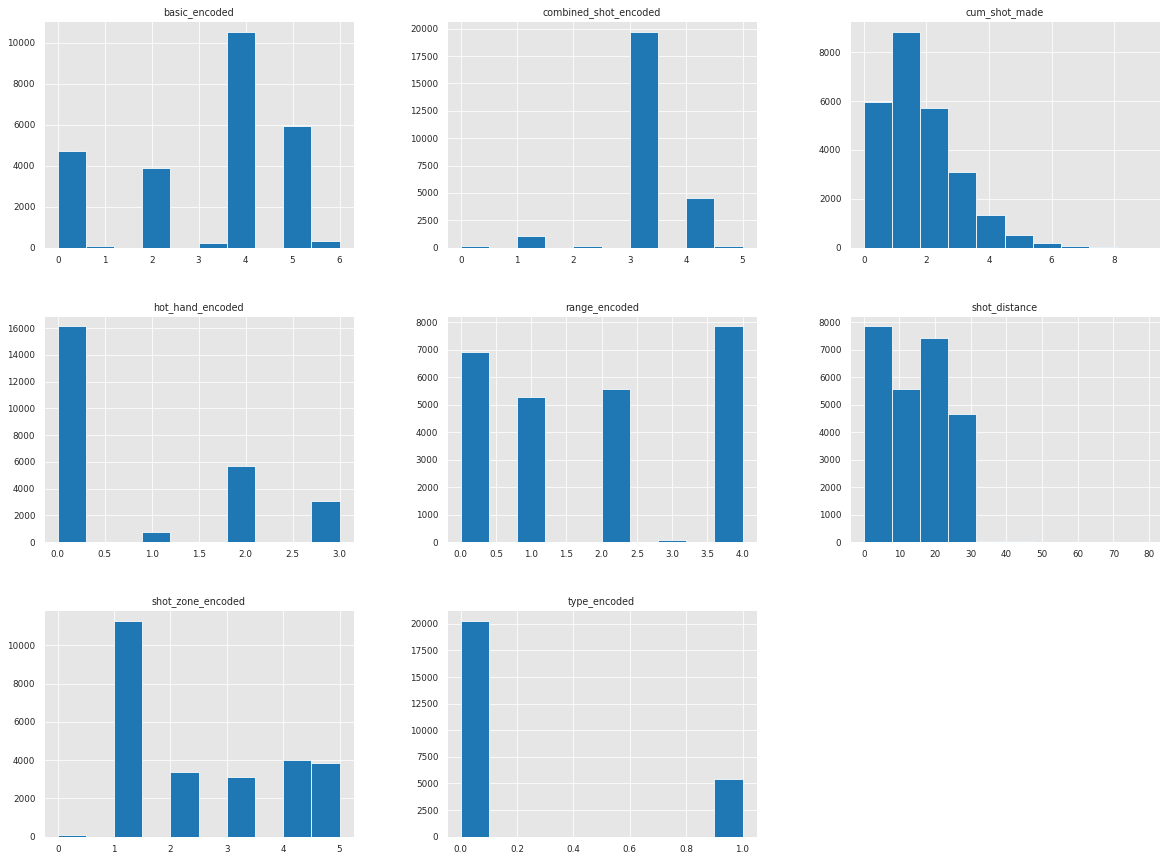

In [162]:
num_bins = 10

kobe[['shot_distance','cum_shot_made','range_encoded','type_encoded',
      'basic_encoded','hot_hand_encoded', 'combined_shot_encoded',
      'shot_zone_encoded']].hist(bins=num_bins, figsize=(20,15))
plt.show()

Declaring the columns we want to use as features

------
## Correlations (part 2)

In [164]:
kobe_corr = kobe.corr()
kobe_corr['shot_made_flag'].sort_values(ascending=False)

shot_made_flag            1.000000
cum_shot_made             0.353142
hot_hand_encoded          0.220103
combined_shot_1           0.200676
basic_5                   0.189385
range_4                   0.169494
range_encoded             0.157635
lat                       0.148070
hot_2                     0.146856
zone_1                    0.141378
basic_encoded             0.139015
type_0                    0.121462
hot_3                     0.118225
combined_shot_4           0.110712
hot_1                     0.081902
combined_shot_0           0.047608
seconds_remaining         0.030804
secondsFromPeriodEnd      0.030775
minutes_remaining         0.028342
combined_shot_2           0.012657
season_en_11              0.012342
season_en_12              0.012159
season_en_4               0.010541
basic_2                   0.006974
season_en_3               0.006628
season_en_5               0.006586
season_en_10              0.006035
season_en_16              0.005481
season_en_2         

## Machine LEarning

We finally made it to the modeling stage. Lets see how well our __data preparation__ _(data processing/wragling, Feature Engineering, Feature Scaling and Selection)_ has done. First we will select our potential features

In [238]:
# 'season',
potentialFeatures = [
    'shot_distance','prior_shot_made','cum_shot_made','secondsFromPeriodEnd','secondsFromPeriodStart',
    'secondsFromGameStart','range_0','range_1','range_2','range_3','range_4','type_0','type_1',
    'basic_0','basic_1','basic_2','basic_3','basic_4','basic_5','basic_6',
    'hot_0','hot_1','hot_2','hot_3','combined_shot_0','combined_shot_1','combined_shot_2','combined_shot_3',
    'combined_shot_4','combined_shot_5','season_en_0','season_en_1','season_en_2','season_en_3','season_en_4','season_en_5',
    'season_en_6','season_en_7','season_en_8','season_en_9','season_en_10','season_en_11','season_en_12','season_en_13',
    'season_en_14','season_en_15','season_en_16','season_en_17','season_en_18','season_en_19',
    'zone_0','zone_1','zone_2','zone_3','zone_4','zone_5'
]

Create a graph to plot top features to show importance

In [239]:
def plot_feature_importances_playoffs(model):
    plt.figure(figsize=(10,5))
    importance = model.feature_importances_
    importance = -np.sort(-importance)
    n_features = len(importance[:20])
    plt.barh(range(n_features), importance[:20], align='center')
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

In [240]:
# y includes our labels (wins and losses) and x includes our features

y = kobe.shot_made_flag
X = kobe[potentialFeatures]

In [241]:
from sklearn.model_selection import train_test_split

# split data train 70% and test 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Logistic Regression Model

In [243]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

print("Accuracy on training set: {:.3f}".format(accuracy_score(y_train,logreg.predict(X_train))))
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_test,logreg.predict(X_test))))

Accuracy on training set: 0.753
Accuracy on test set: 0.749


### Support Vector Machine

In [244]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(accuracy_score(y_train, svc.predict(X_train))))
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_test, svc.predict(X_test))))

Accuracy on training set: 0.756
Accuracy on test set: 0.601


We can tell that scalling made a pretty bit difference on both the training set and the test set.  From here, lets try increasing either `C` or `gamma` to fit a more complex model.

In [222]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.824
Accuracy on test set: 0.791


## Random Forest

Accuracy on training set: 0.989
Accuracy on test set: 0.760


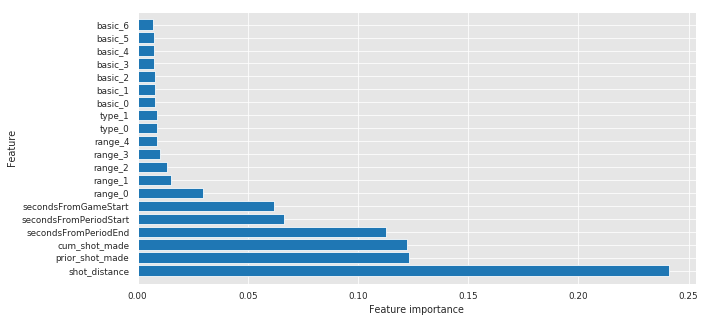

In [245]:
from sklearn.ensemble import RandomForestClassifier

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(accuracy_score(y_train,clf_rf.predict(X_train))))
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_test,clf_rf.predict(X_test))))
plot_feature_importances_playoffs(clr_rf)

### Gradient Boosting

Accuracy on training set: 0.810
Accuracy on test set: 0.800
Feature Importance: 
 None


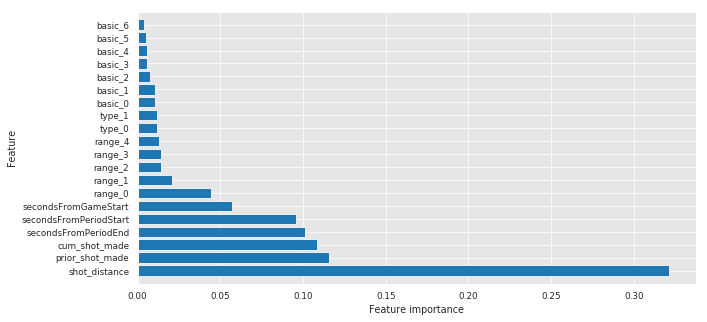

In [246]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))
print("Feature Importance: \n",plot_feature_importances_playoffs(gb))

### Neural Network

In [219]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.67
Accuracy on test set: 0.66


This is likely due to scaling of the data. Neural networks also expect all input features to vary in a similar way, and ideally to have a mean of 0, and a variance of 1. We must rescale our data so that it fulfills these requirements.

In [221]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.824
Accuracy on test set: 0.789


In [225]:
mlp = MLPClassifier(max_iter=4000, alpha=1, random_state=0)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.710
Accuracy on test set: 0.703


### References

* [dataset and motivation] [Kaggle's Kobe Bryant Shot Selection](https://www.kaggle.com/c/kobe-bryant-shot-selection)
* [Visualization] [seaborn.pydata categorical documention](https://seaborn.pydata.org/tutorial/categorical.html?highlight=color%20bar)
* [Pearson Correlation] [datascience - intro to correlation](https://www.datascience.com/blog/introduction-to-correlation-learn-data-science-tutorials)
* [One Hot Encoding] [Python One Hot Encoding with Scikit Learn](http://www.handsonmachinelearning.com/blog/McTKK/python-one-hot-encoding-with-scikit-learn)
    * [One Hot Encoding] [Hot to One Hot Encoding: machinelearningmastery](https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/)


* [Article] [Momentum Isn’t Magic—Vindicating the Hot Hand with the Mathematics of Streaks](https://www.scientificamerican.com/article/momentum-isnt-magic-vindicating-the-hot-hand-with-the-mathematics-of-streaks/)
* [Research Paper] [Surprised by the Gambler's and Hot Hand Fallacies? A Truth in the Law of Small Numbers](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2627354)
* [Research Paper] [The Hot Hand Fallacy: Cognitive Mistakes or Equilibrium Adjustments? Evidence from Baseball](https://www.gsb.stanford.edu/faculty-research/working-papers/hot-hand-fallacy-cognitive-mistakes-or-equilibrium-adjustments)